In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

In [6]:
#part1
#
#
#prameter setting
file_name = 'Exam_Industries.xlsx'

R_p_start = 0
R_p_end = 2

y_ticks_start = 0
y_ticks_end = 2.1
y_ticks_increment = 0.1

x_label = 'std Dev of Return'
y_label = 'Expected Return'
title = 'Minimum-variance Frontier'

#df = pd.read_csv(filename, index_col=0)
df = pd.read_excel(file_name, index_col=0)

mean_std = pd.DataFrame({"mean_return":df.mean(),"std_return":df.std()})
print(mean_std)

#1.calculate n*n covariance maxix of return
V = df.cov()
#2.calcuate alpha=R'V^(-1)e zeta=R'V^(-1)R delta=e'V^(-1)e 
V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)
R = mean_std["mean_return"]
e = pd.Series([1]*len(V))
e.index = R.index

alpha = R.dot(V_inv).dot(e)
zeta = R.dot(V_inv).dot(R)
delta = e.dot(V_inv).dot(e)
R_mv = alpha/delta



       mean_return  std_return
Cnsmr     0.976250    4.535628
Manuf     0.792250    4.748694
HiTec     1.229750    4.865201
Hlth      1.105500    4.313856
Other     1.046917    5.117325


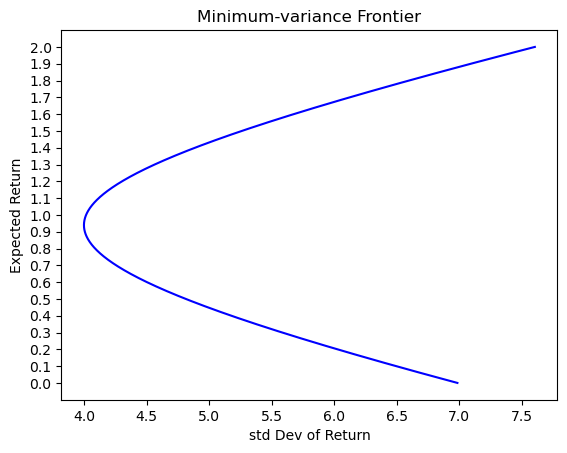

In [7]:
#R_p from 0% to 2%
R_p = np.linspace(R_p_start, R_p_end, 1000) 

sigma_p = np.sqrt(1/delta + delta/(zeta*delta-alpha**2)*(R_p-R_mv)**2)

plt.plot(sigma_p, R_p, color='blue', linestyle='-')

#in increments of 0.1%
plt.yticks(np.arange(y_ticks_start, y_ticks_end, y_ticks_increment))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.show() 

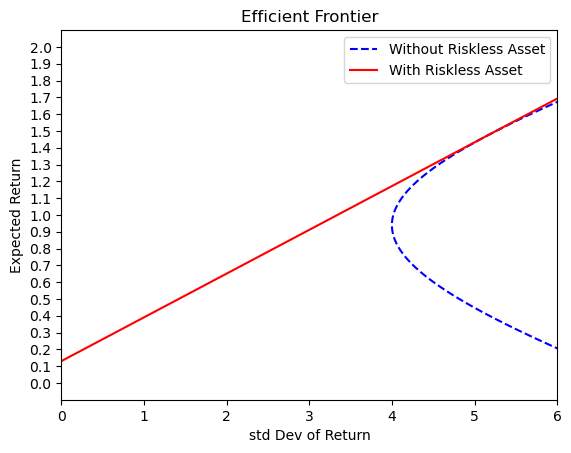

In [8]:
#part 2
#
#
#prameters setting
R_f = 0.13

R_p_riskless_start = 0
R_p_riskless_end = 2

label1 = "Without Riskless Asset"
label2 = "With Riskless Asset"

yticks_start = 0
yticks_end = 2.1
yticks_increment = 0.1

xlim_start = 0
xlim_end = 6

xlabel = 'std Dev of Return'
ylabel = 'Expected Return'
title = 'Efficient Frontier'

R_p_riskless = np.linspace(R_p_riskless_start, R_p_riskless_end, 1000) 
sigma_p_riskless = (R_p_riskless-R_f)/np.sqrt(zeta - 2*alpha*R_f + delta*(R_f**2))

plt.plot(sigma_p, R_p, color='blue', linestyle='--', label = label1)
plt.plot(sigma_p_riskless, R_p_riskless, color='red', linestyle='-', label = label2)

plt.yticks(np.arange(yticks_start, y_ticks_end, y_ticks_increment))
plt.xlim(xlim_start,xlim_end)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()
plt.show()

In [9]:
#part 3
#
#
sharpe_ratio = np.sqrt(zeta - 2*alpha*R_f + delta*R_f**2)

print(f"sharpe_ratio:{sharpe_ratio}")


R_tg = (alpha*R_f - zeta)/(delta*R_f - alpha)
a = (zeta*V_inv.dot(e)-alpha*V_inv.dot(R))/(zeta*delta-alpha**2)
b = (delta*V_inv.dot(R) - alpha*V_inv.dot(e))/(zeta*delta-alpha**2)
w_star = a + b*R_tg
w_star

sharpe_ratio:0.2605310937940091


Cnsmr   -0.443196
Manuf   -0.622140
HiTec    1.032225
Hlth     0.772179
Other    0.260932
dtype: float64